In [67]:
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import argparse
import cv2
import os
img = cv2.imread(r'C:\Users\mypc\Downloads\755275_1304907_bundle_archive\Love is Love\Dataset\Test107.jpg',0)


In [68]:
filename = "{}.png".format(os.getpid())
print(filename)

cv2.imwrite(filename, img)

14220.png


True

In [69]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract"
text = pytesseract.image_to_string(Image.open(filename))
print(text)
os.remove(filename)

lesbianvenom:

lesbianvenom:

straighteners aren’t worth ur money i’ve been using one for three
weeks and i’m still definitely a lesbian

in all my 20 years of living this has been by far my best joke ever


In [50]:
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r"./preprocess/img_gray.png",img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"./preprocess/img_blur.png",img)    
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite(r"./preprocess/img_threshold.png",img)
    return img

In [51]:
import cv2
import pytesseract
# read image
im= cv2.imread(r'C:\Users\mypc\Downloads\755275_1304907_bundle_archive\Love is Love\Dataset\Test107.jpg')
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract"
orig = im.copy()
(origH, origW) = im.shape[:2]
# configurations
config = ('-l eng --oem 1 --psm 3')
im_gray = gray(im)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)

contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [52]:
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2.imshow('cnt',rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)

In [64]:

x=str(contours_text(orig, im, contours))
print(contours_text(orig, im, contours))

lesbianvenom:

lesbianvenom:

straighteners aren’t worth ur money i’ve been using one for three
weeks and i’m still definitely a lesbian

in all my 20 years of living this has been by far my best joke ever
lesbianvenom:

lesbianvenom:

straighteners aren’t worth ur money i’ve been using one for three
weeks and i’m still definitely a lesbian

in all my 20 years of living this has been by far my best joke ever
None


In [72]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
tokenized_word=sent_tokenize(text)
tokenized_text=word_tokenize(text)
print(tokenized_text)

['lesbianvenom', ':', 'lesbianvenom', ':', 'straighteners', 'aren', '’', 't', 'worth', 'ur', 'money', 'i', '’', 've', 'been', 'using', 'one', 'for', 'three', 'weeks', 'and', 'i', '’', 'm', 'still', 'definitely', 'a', 'lesbian', 'in', 'all', 'my', '20', 'years', 'of', 'living', 'this', 'has', 'been', 'by', 'far', 'my', 'best', 'joke', 'ever']


In [73]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 1 samples and 1 outcomes>


In [74]:
fdist.most_common(2)

[('lesbianvenom:\n\nlesbianvenom:\n\nstraighteners aren’t worth ur money i’ve been using one for three\nweeks and i’m still definitely a lesbian\n\nin all my 20 years of living this has been by far my best joke ever',
  1)]

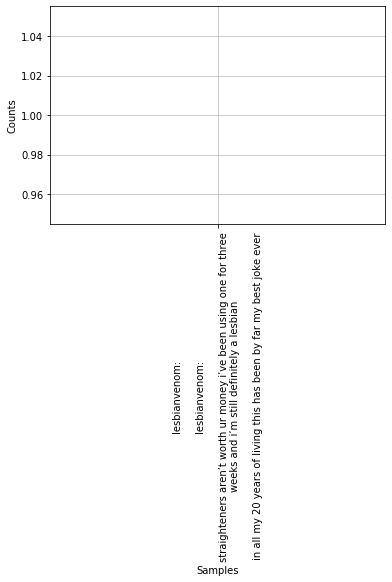

In [75]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [76]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'themselves', "aren't", 'wouldn', 'above', 'other', 'be', 'between', 'some', 'had', 'a', 'do', 're', 'he', 'which', 'out', 'under', 'just', 'from', 'were', 'having', 'himself', 'they', 'here', 'itself', 'for', 'very', 've', 'after', "it's", 'before', 'hadn', 'was', 'not', 'am', 'with', 'because', 'his', 'should', "mustn't", 'how', 'further', 'all', "shan't", 'in', "she's", 'any', 'each', 'again', 'our', 'that', 'why', 'this', 'is', 'same', "you'd", 'than', 't', "mightn't", "you've", 'we', 'o', 'doing', "shouldn't", 'your', 'both', 'don', 'been', 'i', 'about', "wasn't", 'so', "needn't", 'weren', 'through', 'until', 'aren', 'ain', 'didn', 'my', 'over', 'then', 'those', 'won', 'or', 'them', 'herself', 'on', 'of', 'needn', "won't", 'her', 'ours', 'you', 'too', "wouldn't", 'will', "didn't", 'now', 'an', 'as', 'shan', "doesn't", 'm', 'while', 'yours', 'she', 'once', 'ourselves', "you'll", 'where', "haven't", 'isn', 'to', 'mightn', 'does', 'their', 'by', 'such', 'couldn', 'theirs', "you're",

In [79]:
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['lesbianvenom', ':', 'lesbianvenom', ':', 'straighteners', 'aren', '’', 't', 'worth', 'ur', 'money', 'i', '’', 've', 'been', 'using', 'one', 'for', 'three', 'weeks', 'and', 'i', '’', 'm', 'still', 'definitely', 'a', 'lesbian', 'in', 'all', 'my', '20', 'years', 'of', 'living', 'this', 'has', 'been', 'by', 'far', 'my', 'best', 'joke', 'ever']
Filterd Sentence: ['lesbianvenom', ':', 'lesbianvenom', ':', 'straighteners', '’', 'worth', 'ur', 'money', '’', 'using', 'one', 'three', 'weeks', '’', 'still', 'definitely', 'lesbian', '20', 'years', 'living', 'far', 'best', 'joke', 'ever']


In [80]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['lesbianvenom', ':', 'lesbianvenom', ':', 'straighteners', '’', 'worth', 'ur', 'money', '’', 'using', 'one', 'three', 'weeks', '’', 'still', 'definitely', 'lesbian', '20', 'years', 'living', 'far', 'best', 'joke', 'ever']
Stemmed Sentence: ['lesbianvenom', ':', 'lesbianvenom', ':', 'straighten', '’', 'worth', 'ur', 'money', '’', 'use', 'one', 'three', 'week', '’', 'still', 'definit', 'lesbian', '20', 'year', 'live', 'far', 'best', 'joke', 'ever']


In [81]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [82]:
tokens=nltk.word_tokenize(text)
print(tokens)

['lesbianvenom', ':', 'lesbianvenom', ':', 'straighteners', 'aren', '’', 't', 'worth', 'ur', 'money', 'i', '’', 've', 'been', 'using', 'one', 'for', 'three', 'weeks', 'and', 'i', '’', 'm', 'still', 'definitely', 'a', 'lesbian', 'in', 'all', 'my', '20', 'years', 'of', 'living', 'this', 'has', 'been', 'by', 'far', 'my', 'best', 'joke', 'ever']


In [83]:
nltk.pos_tag(tokens)

[('lesbianvenom', 'NN'),
 (':', ':'),
 ('lesbianvenom', 'NN'),
 (':', ':'),
 ('straighteners', 'NNS'),
 ('aren', 'VBP'),
 ('’', 'JJ'),
 ('t', 'NN'),
 ('worth', 'NN'),
 ('ur', 'JJ'),
 ('money', 'NN'),
 ('i', 'NN'),
 ('’', 'VBP'),
 ('ve', 'NN'),
 ('been', 'VBN'),
 ('using', 'VBG'),
 ('one', 'CD'),
 ('for', 'IN'),
 ('three', 'CD'),
 ('weeks', 'NNS'),
 ('and', 'CC'),
 ('i', 'JJ'),
 ('’', 'NNP'),
 ('m', 'NN'),
 ('still', 'RB'),
 ('definitely', 'RB'),
 ('a', 'DT'),
 ('lesbian', 'JJ'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('my', 'PRP$'),
 ('20', 'CD'),
 ('years', 'NNS'),
 ('of', 'IN'),
 ('living', 'NN'),
 ('this', 'DT'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('by', 'IN'),
 ('far', 'RB'),
 ('my', 'PRP$'),
 ('best', 'JJS'),
 ('joke', 'NN'),
 ('ever', 'RB')]

In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(text)

ValueError: Iterable over raw text documents expected, string object received.